In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.pylab import subplots
import matplotlib.mlab as mlab
import matplotlib.patches as patches

In [2]:
fname='player_attributes.csv'
pl=pd.read_csv(fname)
pl['Attack']=pl.loc[:,['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']].mean(1)
pl['Skill']=pl.loc[:,['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control']].mean(1)
pl['Movement']=pl.loc[:,['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']].mean(1)
pl['Power']=pl.loc[:,['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']].mean(1)
pl['Defending']=pl.loc[:,['Marking', 'Standing Tackle', 'Sliding Tackle']].mean(1)
pl['Goalkeeping']=pl.loc[:,[ 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(1)
pl['Attacking+Skill']=pl.loc[:,['Attack','Skill']].mean(1)
pl['Mentality']=pl.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
ph=pl['Height'].tolist()
ph=[i.strip('""').split('\'') for i in ph]
ph=np.array([(int(i[0])*12+int(i[1]))*2.54 for i in ph])
pl['H/cm']=ph
pw=pl['Weight'].values*0.4535924
BMI=pw/ph**2*1e4
pl['BMI']=BMI

In [3]:
plp=pl.groupby('Player Category')
sp=plp.get_group('Striker')
gp=plp.get_group('GoalKeeper')
mp=plp.get_group('Midfielder')
dp=plp.get_group('Defender')

In [4]:
pl.loc[pl.index[pl['Player Category']=='Striker'],'Mentality']=sp.loc[:,['Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
pl.loc[pl.index[pl['Player Category']=='Defender'],'Mentality']=dp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(1)
op=pd.concat([sp,mp,dp])

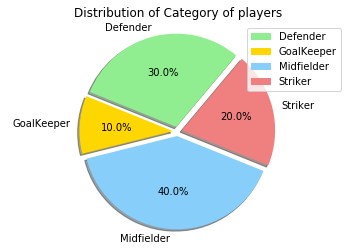

In [27]:
sizes=plp.count()['H/cm']
explode=[0.05,0.05,0.05,0.05]
labels=['Defender','GoalKeeper','Midfielder','Striker']
colors=['lightgreen','gold','lightskyblue','lightcoral']
pie=plt.pie(sizes,explode=explode, shadow=True,labels=labels,colors=colors,autopct='%1.1f%%',startangle=50)
plt.axis('equal')
plt.title('Distribution of Category of players')
plt.legend()

In [6]:
opH=op.groupby('H/cm').mean()
opW=op.groupby('Weight').mean()
opB=op.groupby('BMI').mean()
gpH=gp.groupby('H/cm').mean()
gpW=gp.groupby('Weight').mean()
gpB=gp.groupby('BMI').mean()

In [7]:
def ddraw(item,unit=''):
    x=pl[item]
    bins = np.linspace(x.min(),x.max(),10)
    x1 = np.linspace(x.min(), x.max(), 100)
    normal = norm.pdf(x1, x.mean(), x.std())*x.count()*(bins[1]-bins[0])
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([dp[item],mp[item],sp[item],gp[item]], bins = bins,rwidth=0.8,edgecolor = 'k',stacked= True,label=['Defender','Midfielder','Striker','GoalKeeper'])
    plt.plot(x1,kde(x1)*x.count()*(bins[1]-bins[0]),linewidth = 3,label='Kernel density')
    plt.plot(x1,normal,label='Normal distribution',linewidth = 3)
    plt.grid(True)
    plt.xlabel(item+' / '*(unit!='')+unit)
    plt.ylabel('Number of players')
    plt.legend(loc= 'best')
    plt.title('Distribution of '+item)

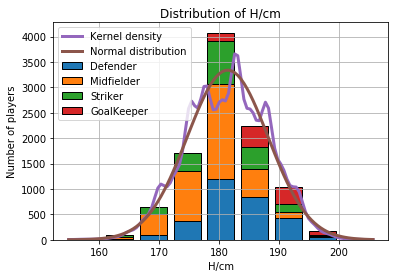

In [10]:
ddraw('H/cm')

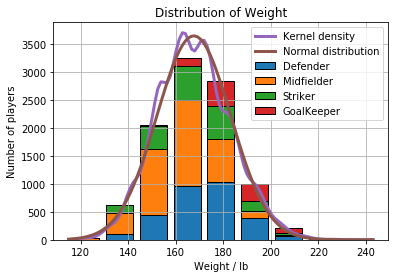

In [11]:
ddraw('Weight','lb')

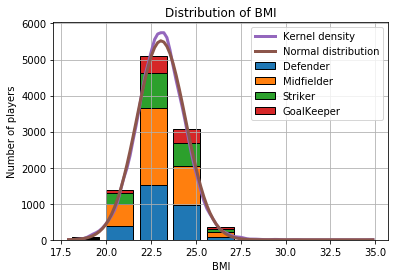

In [12]:
ddraw('BMI')

In [13]:
def pt(x,item,ply):
    for i in range(3):
        x1=x[i].index.values
        y1=x[i][item].values
        z1 = np.polyfit(x1, y1, 5)
        p1 = np.poly1d(z1)
        xv=np.linspace(min(x1),max(x1),100)
        yv=p1(xv)
        xname=x[i].index.name
        dx=ply[xname]
        normal = mlab.normpdf(xv, dx.mean(), dx.std())
        fig,ax=subplots()
        ax.scatter(xv, yv, c=normal, cmap=plt.cm.Blues,edgecolor='deepskyblue', s=20)
        ax.fill_between(xv,yv,min(yv)-10, facecolor='dodgerblue', alpha=0.6)
        ax.set_xlabel(xname+' / lb'*(xname=='Weight'))    
        ax.set_ylabel(item)
        ax.set_title(item +' vs '+xname)    
        ax.grid(True)
        fig.show()



In [14]:
def ptt(x,item,ply):
    for i in range(3):
        x1=x[i].index.values
        y1=x[i][item].values
        z1 = np.polyfit(x1, y1, 5)
        p1 = np.poly1d(z1)
        xv=np.linspace(min(x1),max(x1),100)
        yv=p1(xv)
        xname=x[i].index.name
        dx=ply[xname]
        normal = norm.pdf(xv, dx.mean(), dx.std())
        normal=normal+max(normal)/4
        fig,ax=subplots()
        #ax.scatter(xv, yv, c=normal, cmap=plt.cm.Blues,edgecolor='deepskyblue', s=20)
        ax.plot(xv, yv, '--')
        d=xv[1]-xv[0]
    
        for i in range(99):
            ax.add_patch(patches.Rectangle((xv[i],0),d,yv[i],color='dodgerblue',linewidth=0,alpha=normal[i]/max(normal)))  
        ax.set_xlabel(xname+' / lb'*(xname=='Weight'))    
        ax.set_ylabel(item)
        ax.set_title(item +' vs '+xname)    
        ax.grid(True)
        


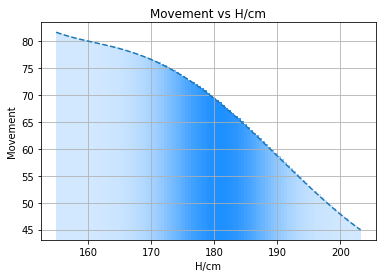

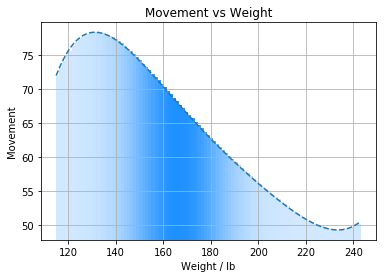

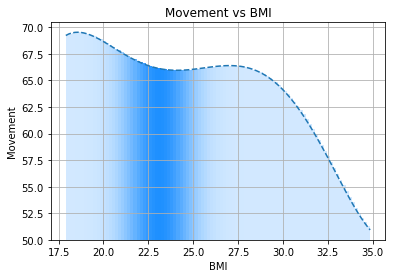

In [15]:
x=[opH,opW,opB]
ply=pd.concat([sp,mp,dp])
ptt(x,'Movement',ply)

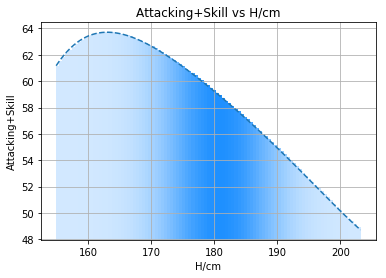

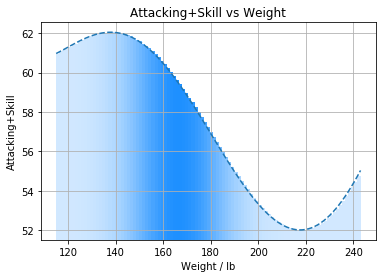

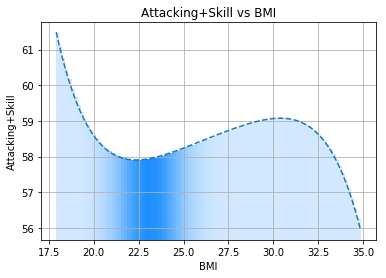

In [16]:
ptt(x,'Attacking+Skill',ply)

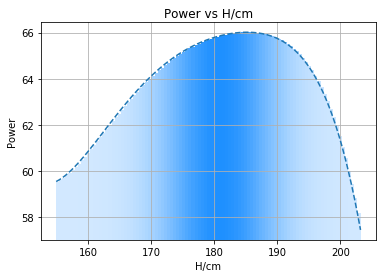

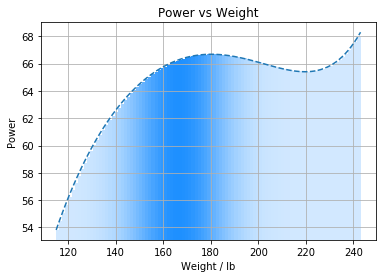

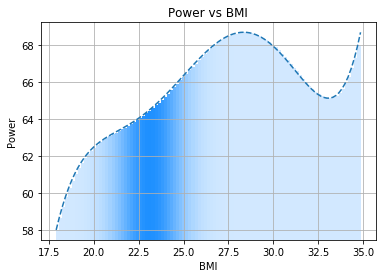

In [17]:
ptt(x,'Power',ply)

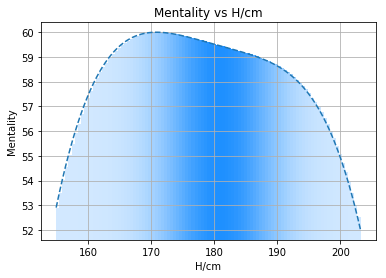

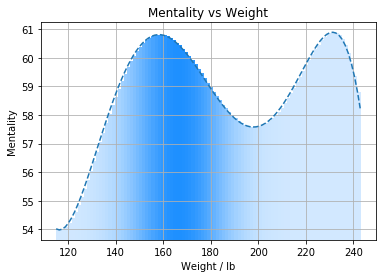

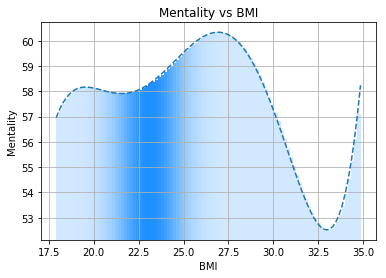

In [18]:
ptt(x,'Mentality',ply)

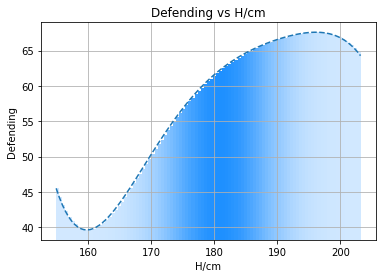

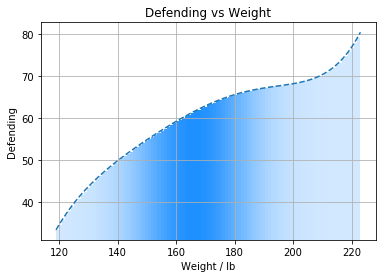

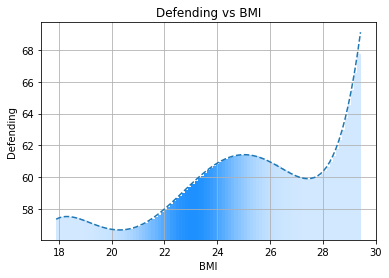

In [19]:
oop=pd.concat([mp,dp])
oopH=oop.groupby('H/cm').mean()
oopW=oop.groupby('Weight').mean()
oopB=oop.groupby('BMI').mean()
x=[oopH,oopW,oopB]
ptt(x,'Defending',oop)

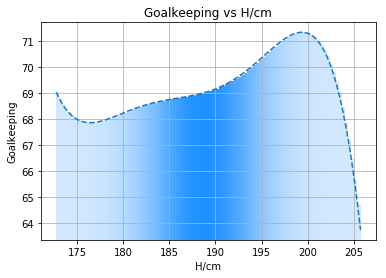

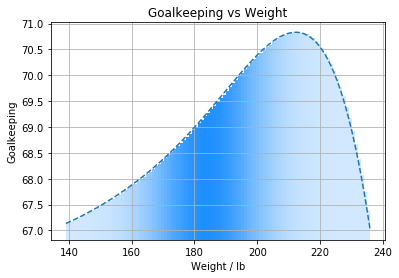

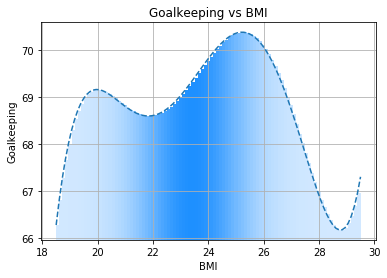

In [20]:
x=[gpH,gpW,gpB]
ptt(x,'Goalkeeping',gp)